# <b> Carga de librerias: </b>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import modules

# <b>Carga de datos:</b>

In [2]:
datos = pd.read_csv('dataset_proyecto.csv', parse_dates=['FECHA_DATE'])
datos['target'] = np.where(datos['DIAS_MORA']>90, 'Vencido', 'Al dia')
datos['PDI'] = (datos['PDI'].str.rstrip('%').astype(float))/100
datos.head()

,FECHA_DATE,BUCKET,BUCKET_WL,CODIGO_CLASE,GRUPO_HOMOGENEO,TIPO_PERSONA,DIAS_MORA,DIAS_INCUMPLIMIENTO,MET_CALCULO,MARCA_CURA,...,RANGO_SCORE_HIP,seg_PD12mes,PD_12M_ACTUAL_FINAL,PD_12M_DESEMBOLSO_FINAL,PD_LIFETIME_ACTUAL_FINAL,PD_LIFETIME_DESEMBOLSO_FINAL,EXPOSICION_TOTAL_FA,VALOR_PROVISION,cobertura,target
0,2021-10-31,1,NaN,2,13,PN,0,NaN,ECL_12M,2.0,...,NaN,PN_CURA,0.325910,0.325910,0.304117,0.066976,3142.9200,520.328516,0.165556,Al dia
1,2021-10-31,1,NaN,2,13,PN,0,NaN,ECL_12M,2.0,...,NaN,PN_CURA,0.425376,0.425376,0.432310,0.220604,33364.3717,7956.298017,0.238467,Al dia
2,2021-10-31,1,NaN,2,13,PN,0,NaN,ECL_12M,2.0,...,NaN,PN_CURA,0.445730,0.445730,0.457113,0.245921,106599.3731,26970.279477,0.253006,Al dia
3,2021-10-31,1,NaN,2,13,PN,0,NaN,ECL_12M,2.0,...,NaN,PN_CURA,0.434547,0.434547,0.455007,0.257770,137366.7897,34997.765487,0.254776,Al dia
4,2021-10-31,1,NaN,2,13,PN,0,NaN,ECL_12M,2.0,...,NaN,PN_CURA,0.343117,0.343117,0.404523,0.217305,95085.2122,23860.250873,0.250935,Al dia


# <b> Exploratoria de columnas </b>

### Descarte de variables por no pertenecer al producto:
Por conocimiento del negocio se descartan las variables <b> 'BUCKET_WL', 'MARCA_WL', 'RANGO_SCORE_HIP', 'CODIGO_CLASE', 'RATING_ACTUAL' </b>

In [3]:
datos.columns

Index(['FECHA_DATE', 'BUCKET', 'BUCKET_WL', 'CODIGO_CLASE', 'GRUPO_HOMOGENEO',
       'TIPO_PERSONA', 'DIAS_MORA', 'DIAS_INCUMPLIMIENTO', 'MET_CALCULO',
       'MARCA_CURA', 'MARCA_DEFAULT', 'MARCA_WL', 'PDI', 'REESTRUCTURADO',
       'RATING_ACTUAL', 'RANGO_SCORE_PN', 'RANGO_SCORE_HIP', 'seg_PD12mes',
       'PD_12M_ACTUAL_FINAL', 'PD_12M_DESEMBOLSO_FINAL',
       'PD_LIFETIME_ACTUAL_FINAL', 'PD_LIFETIME_DESEMBOLSO_FINAL',
       'EXPOSICION_TOTAL_FA', 'VALOR_PROVISION', 'cobertura', 'target'],
      dtype='object')

In [4]:
descartados = ['FECHA_DATE', 'BUCKET_WL', 'MARCA_WL', 'RANGO_SCORE_HIP', 'CODIGO_CLASE', 'RATING_ACTUAL']
seleccion = [x for x in datos.columns if x not in descartados]
datos = datos[seleccion]

# <b>  Validación de balance de datos </b>

In [5]:
datos['target'].value_counts()

Al dia     7968
Vencido    6894
Name: target, dtype: int64

# <b>Analisis de datos </b>

### Tipos de datos

In [6]:
datos.dtypes, datos.shape[1]

(BUCKET                            int64
 GRUPO_HOMOGENEO                   int64
 TIPO_PERSONA                     object
 DIAS_MORA                         int64
 DIAS_INCUMPLIMIENTO             float64
 MET_CALCULO                      object
 MARCA_CURA                      float64
 MARCA_DEFAULT                     int64
 PDI                             float64
 REESTRUCTURADO                  float64
 RANGO_SCORE_PN                  float64
 seg_PD12mes                      object
 PD_12M_ACTUAL_FINAL             float64
 PD_12M_DESEMBOLSO_FINAL         float64
 PD_LIFETIME_ACTUAL_FINAL        float64
 PD_LIFETIME_DESEMBOLSO_FINAL    float64
 EXPOSICION_TOTAL_FA             float64
 VALOR_PROVISION                 float64
 cobertura                       float64
 target                           object
 dtype: object,
 20)

### Clasificación de variables: Categoricas, Discretas y Continuas

In [7]:
categoric_vars, discrete_vars, continues_vars = modules.getColumnsDataTypes(df=datos)
print(len(categoric_vars) + len(discrete_vars) + len(continues_vars))
categoric_vars.remove('target')

20


### Analisis de variables categoricas

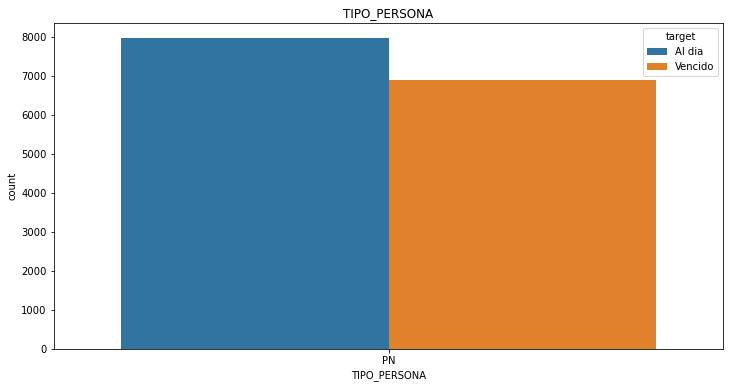

PN    14861
Name: TIPO_PERSONA, dtype: int64


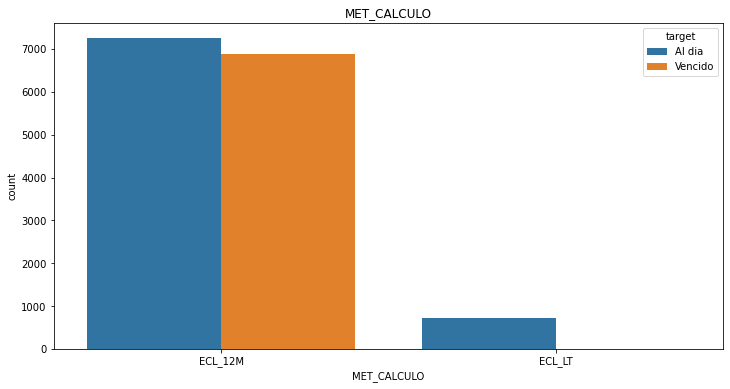

ECL_12M    14142
ECL_LT       720
Name: MET_CALCULO, dtype: int64


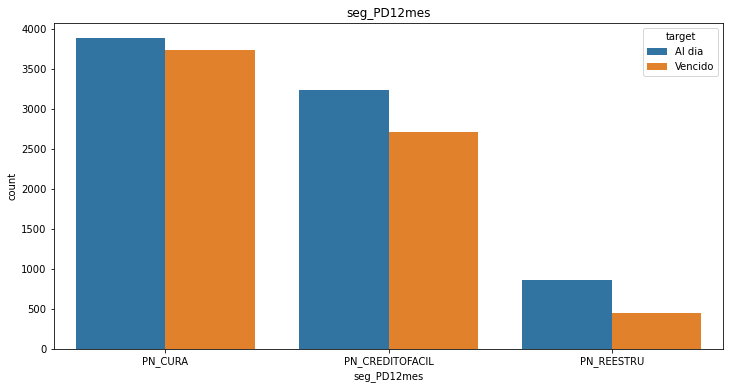

PN_CURA            7610
PN_CREDITOFACIL    5942
PN_REESTRU         1309
Name: seg_PD12mes, dtype: int64


In [8]:
modules.plotCategoricalVals(datos, categoric_vars, y='target')

### Analisis de variables discretas

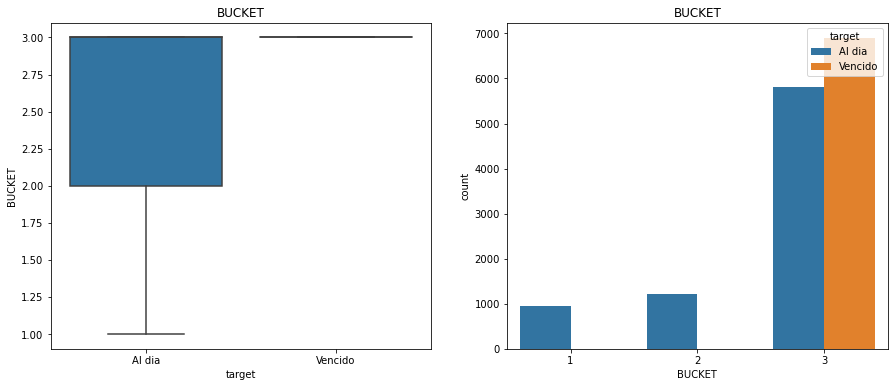

3    12709
2     1209
1      944
Name: BUCKET, dtype: int64


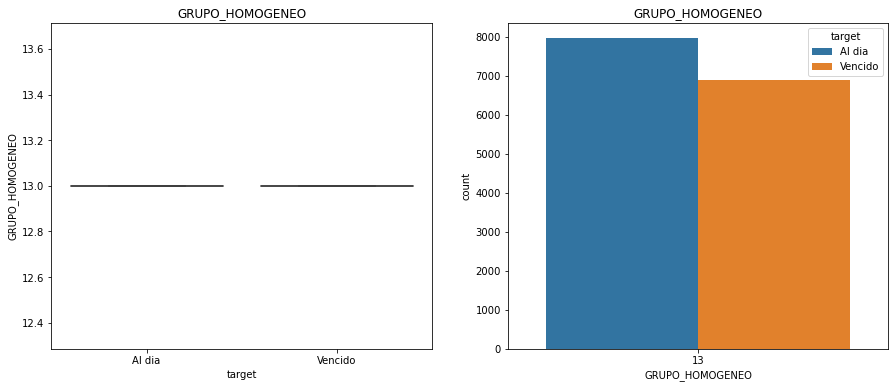

13    14862
Name: GRUPO_HOMOGENEO, dtype: int64


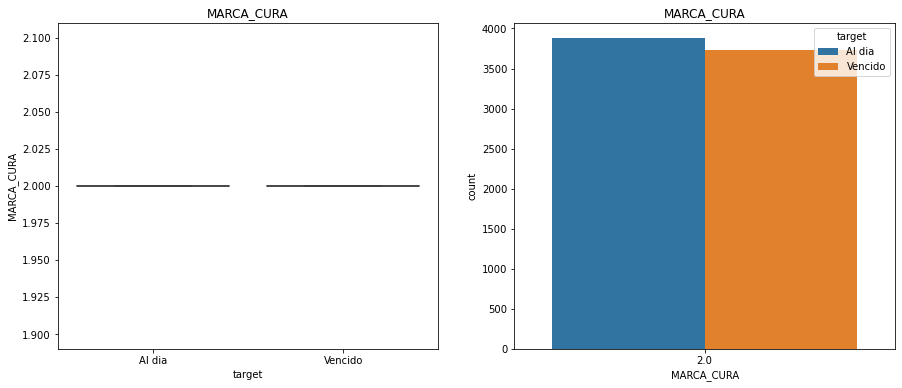

2.0    7610
Name: MARCA_CURA, dtype: int64


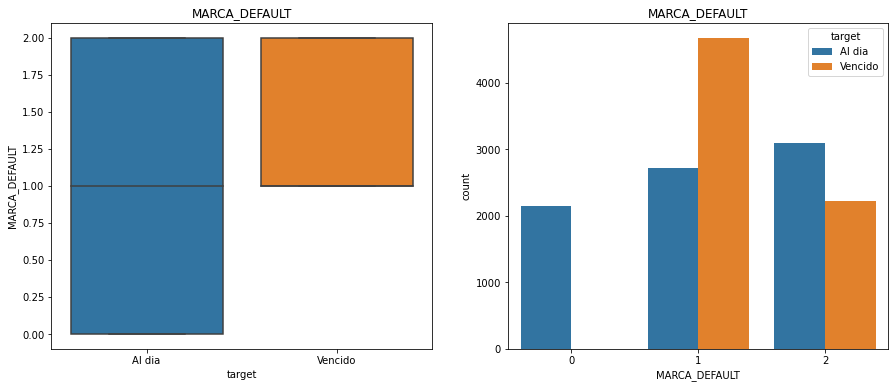

1    7387
2    5322
0    2153
Name: MARCA_DEFAULT, dtype: int64


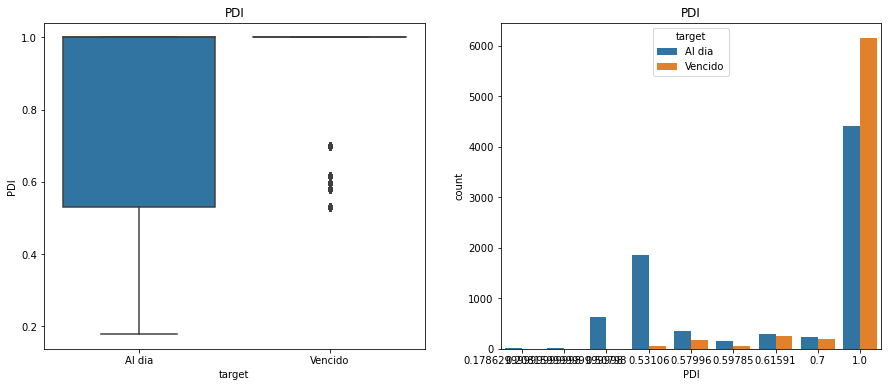

1.00000    10571
0.53106     1909
0.50798      633
0.61591      558
0.57996      519
0.70000      440
0.59785      197
0.20816       23
0.17863       12
Name: PDI, dtype: int64


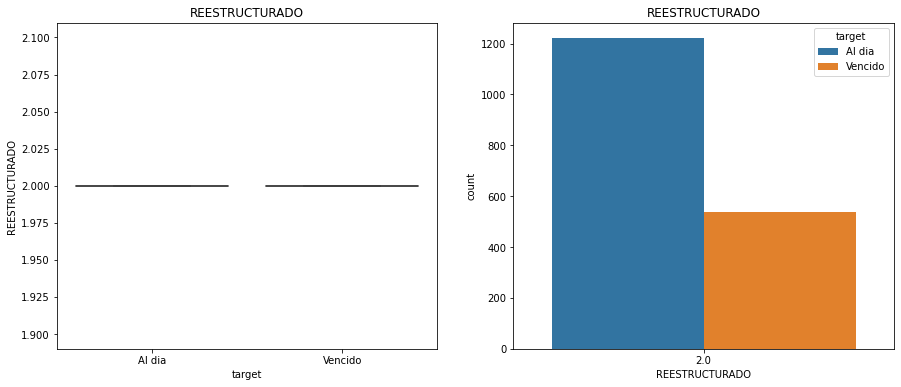

2.0    1758
Name: REESTRUCTURADO, dtype: int64


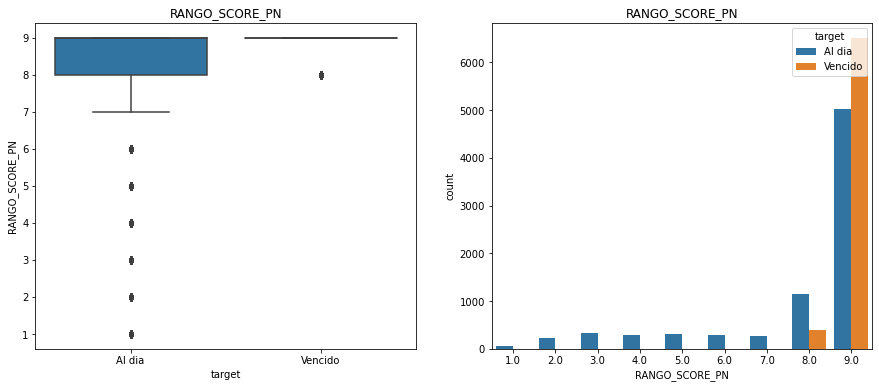

9.0    11528
8.0     1543
3.0      339
5.0      312
4.0      300
6.0      287
7.0      273
2.0      228
1.0       51
Name: RANGO_SCORE_PN, dtype: int64


In [9]:
modules.plotDiscreteVals(datos, discrete_vars, y='target')

### Analisis de variables continuas

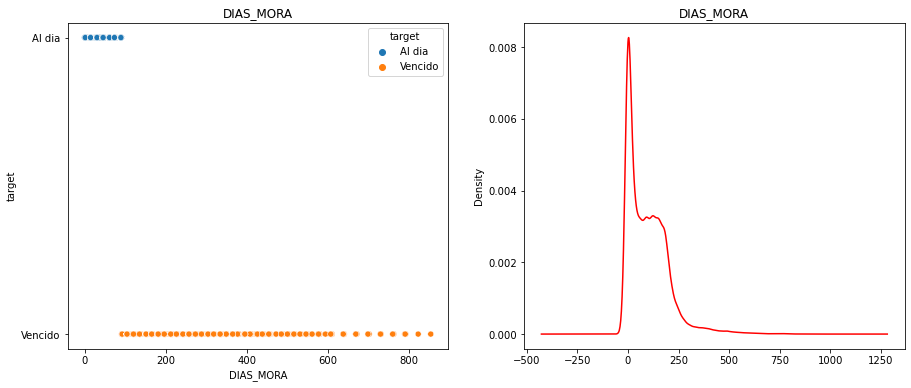

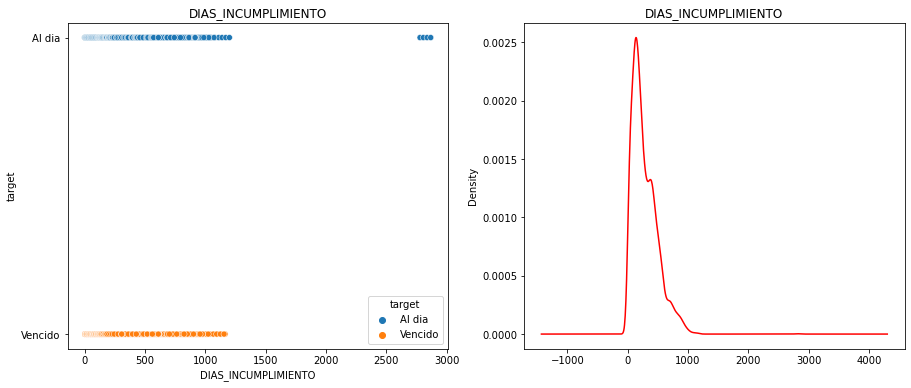

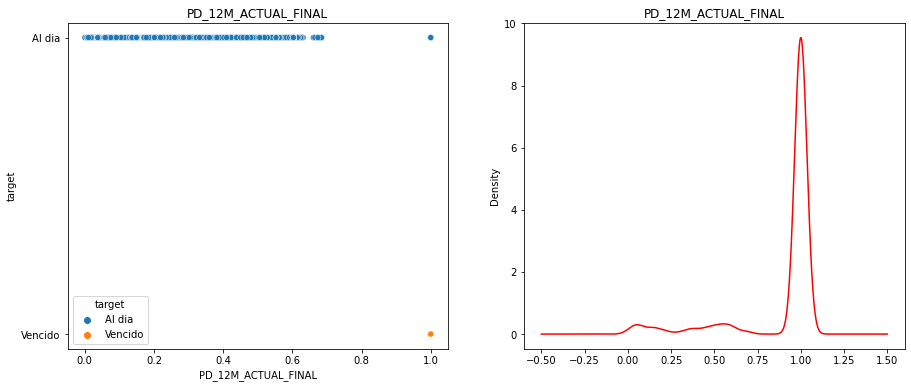

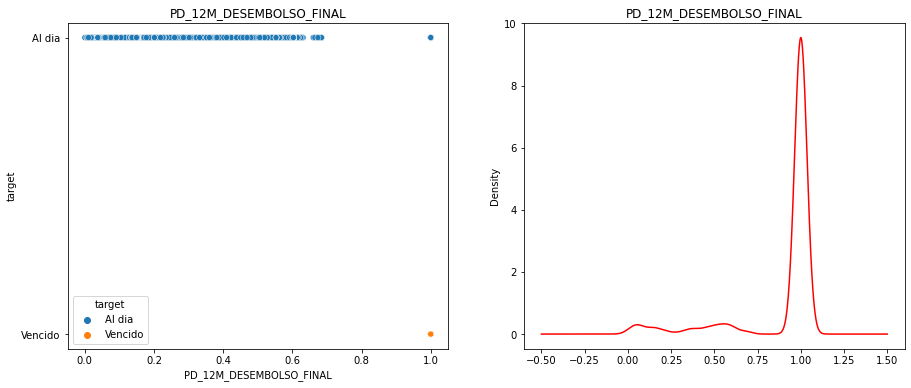

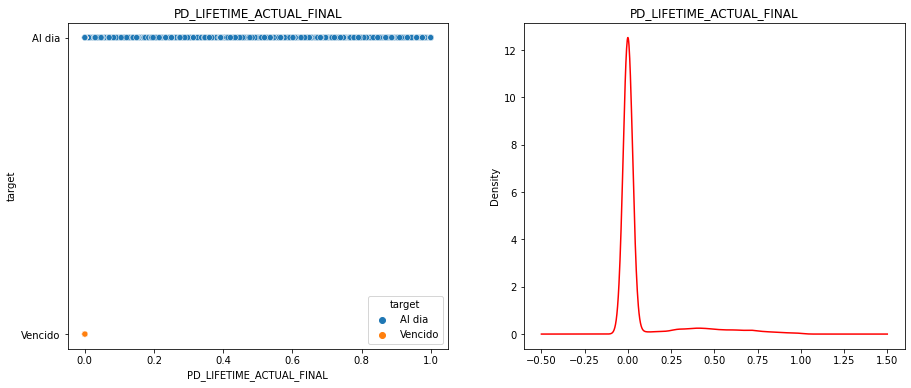

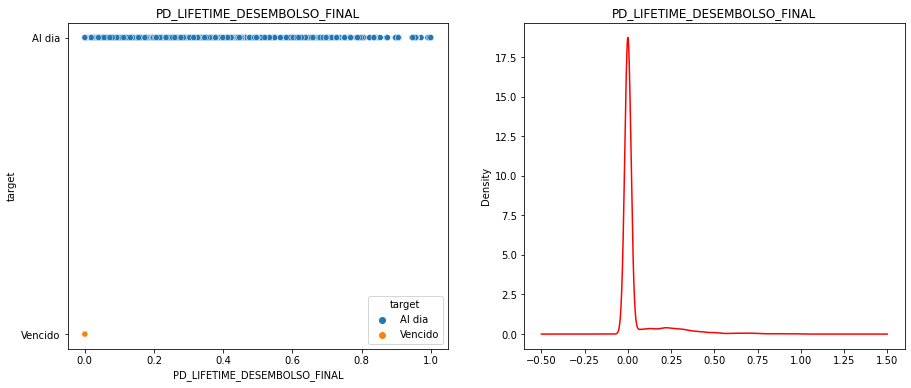

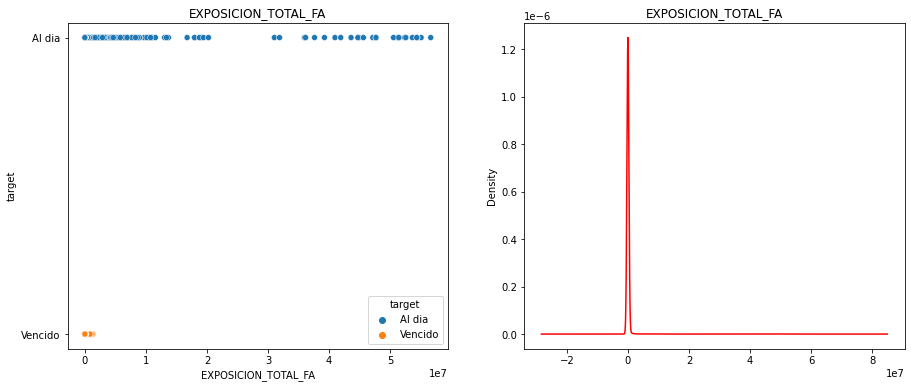

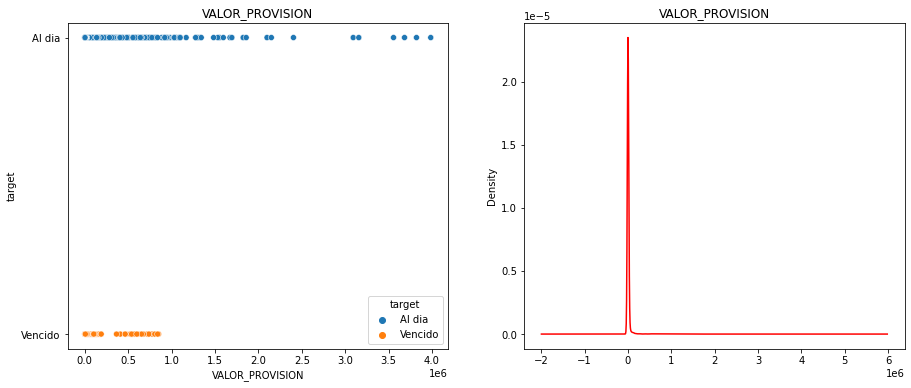

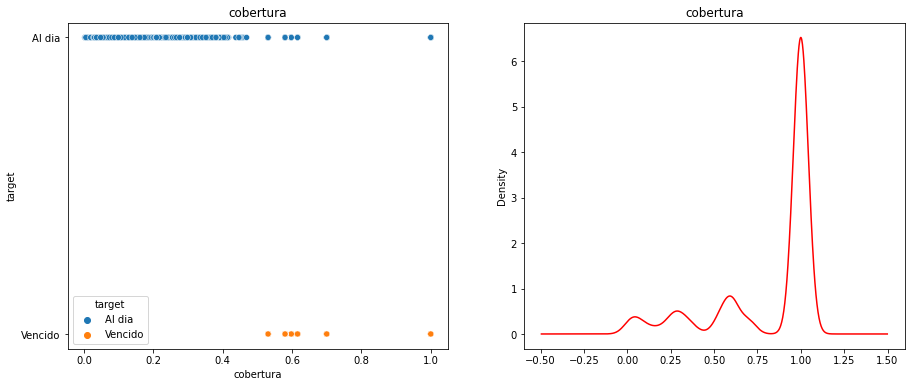

In [10]:
modules.plotContinueVals(datos, continues_vars, y='target')

## <b> Interpretación de resultados </b>

### Descarte de variables previo al analisis

In [11]:
print(f"""
Por conocimiento del negocio se descartan las variables: {descartados}
""")


Por conocimiento del negocio se descartan las variables: ['FECHA_DATE', 'BUCKET_WL', 'MARCA_WL', 'RANGO_SCORE_HIP', 'CODIGO_CLASE', 'RATING_ACTUAL']



### Descarte de variables despues del analisis:
Se decartan las variables al verificar que corresponden unicamente a flags del producto y existe un campo adicional para una <br>
mejor segmentación de las marcas de cura y reestrutura

In [12]:
seleccion.remove('GRUPO_HOMOGENEO')
seleccion.remove('TIPO_PERSONA')
seleccion.remove('MARCA_CURA')
seleccion.remove('REESTRUCTURADO')
datos = datos[seleccion]

In [13]:
datos.to_csv('dataset_proyecto_analisis.csv', index=False)